In [1]:
import numpy as np 
import cv2 
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
folder_path = 'faces/train'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]

features = []
for image_file in image_files:
    image = Image.open(os.path.join(folder_path, image_file))
    resized_image = image.resize((200, 200))
    equalized_image = cv2.equalizeHist(np.array(resized_image))
    feature_vector = np.array(equalized_image).flatten()
    features.append(feature_vector)

X = np.array(features)

pca = PCA(n_components=150)
pca.fit(X)

eigenfaces = pca.components_
X_projected = pca.transform(X)


In [3]:
# parameters = {'kernel':['rbf', 'poly'], 'C': np.logspace(-3,3,5), 'gamma': np.logspace(-3,3,5)}
# svm_gscv = GridSearchCV(svm.SVC(),parameters,cv=5)
# svm_gscv.fit(X_train, y_train)

In [4]:
label = ['Duy Anh']*907 + ['Nghia']*1002 + ['Duy Anh']*496 + ['Duy']*1503 + ['Huy']*1002 + ['Thanh']*501 + ['Nghia']*510 + ['Thanh']*1002
X_train, X_test, y_train, y_test = train_test_split(X_projected, label, test_size=0.2, random_state=43)
svm = SVC(kernel= 'rbf', C = 0.1) 
svm.fit(X_train, y_train)

SVC(C=0.1)

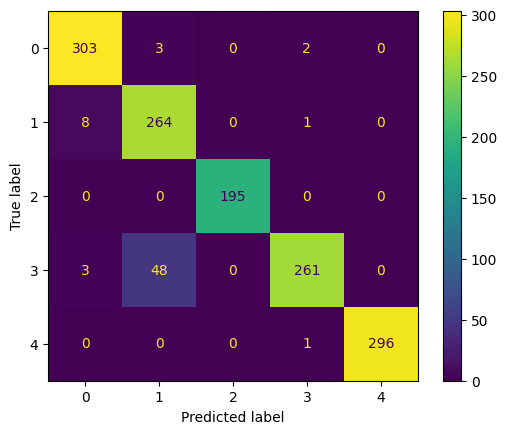

In [5]:
# y_pred = svm_gscv.predict(X_test)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [6]:
svm.fit(X_projected, label)

SVC(C=0.1)

In [7]:
set(label)

{'Duy', 'Duy Anh', 'Huy', 'Nghia', 'Thanh'}

In [8]:
cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eyes_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
threshold = 4

while(cap.isOpened()):
    ret,frame = cap.read()
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) #frame là array
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 4)
    
    for (x,y,h,w) in faces:
        cv2.rectangle(frame, (x,y), (x+w ,y+h), (0,255,0), 3)       
        eyes_gray = gray[y:y+h, x:x+w]       
        eyes_color = frame[y:y+h, x:x+w]       
        eyes = eyes_cascade.detectMultiScale(eyes_gray)       
        for(ex,ey,eh,ew) in eyes :      
            cv2.rectangle(eyes_color, (ex, ey), (ex+ew, ey+eh), (0,0,255), 3)            

        face = gray[y:y+h, x:x+w].copy()
        face = np.resize(face, (200, 200))
        face = cv2.equalizeHist(face)
        face = face.flatten()

        face_projected = pca.transform(face.reshape(1, -1))
        decision_value = svm.decision_function(face_projected)
        
        if np.max(decision_value) < threshold:
            predicted_label = ["Unknown"]
        else:
            predicted_label = svm.predict(face_projected)

        cv2.putText(frame, predicted_label[0], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(1)
    if(key == 27):
        break 
        
cap.release()
cv2.destroyAllWindows()

#{'Duy', 'Duy Anh', 'Huy', 'Nghia', 'Thanh'}